# Primera preentrega

- Nombre: Michael Meneses
- Comisión: 61605
- Dataset: Telco Customer Churn

## Introducción ✨
El propósito de este análisis es identificar los factores clave asociados a la fuga de clientes (**Churn**) en una compañía de telecomunicaciones. Al entender estas relaciones, buscamos proponer estrategias que ayuden a reducir la tasa de abandono y retener a los clientes actuales.

## Dataset 📄
Se compone de información de clientes que han dado de baja algún producto en el último mes, servicios contratados dentro de la compañía por cada cliente, información sobre la existencia del cliente dentro de la compañía e información demográfica de cada uno de ellos. Contiene 21 columnas y 7043 registros.
- **customerID:** Es un dato categórico que indica un ID único por cliente
- **gender:** Es un dato categórico que indica el género del cliente. Dicho valor puede ser "male" o "female"
- **SeniorCitizen:** Es un dato numérico que indica si el cliente es una persona mayor. Dicho valor será 1 (true) o 0 (false)
- **Partner:** Es un dato categórico que indica si el cliente tiene pareja. Dicho valor será "Yes" o "No"
- **Dependents:** Es un dato categórico que indica si el cliente tiene personas a cargo. Dicho valor será "Yes" o "No"
- **tenure:** Es un dato numérico que indica la cantidad de meses que el cliente tiene dentro de la compañía
- **PhoneService:** Es un dato categórico que indica si el cliente tiene servicio telefónico contratado. Dicho valor será "Yes" o "No"
- **MultipleLines:** Es un dato categórico que indica si el cliente tiene múltiples líneas. Dicho valor será "Yes", "No" o "No phone service"
- **InternetService:** Es un dato categórico que indica el tipo de servicio de internet contratado por el cliente. Dicho valor será "DSL", "Fiber optic" o "No"
- **OnlineSecurity:** Es un dato categórico que indica si el cliente tiene contratado el producto "Online Security". Dicho valor será "Yes", "No" o "No internet service"
- **OnlineBackup:** Es un dato categórico que indica si el cliente tiene contratado el producto "Online Backup". Dicho valor será "Yes", "No" o "No internet service"
- **DeviceProtection:** Es un dato categórico que indica si el cliente tiene contratado el producto "Device Protection". Dicho valor será "Yes", "No" o "No internet service"
- **TechSupport:** Es un dato categórico que indica si el cliente tiene contratado el producto "Tech Support". Dicho valor será "Yes", "No" o "No internet service"
- **StreamingTV:** Es un dato categórico que indica si el cliente tiene contratado el producto "Streaming TV". Dicho valor será "Yes", "No" o "No internet service"
- **StreamingMovies:** Es un dato categórico que indica si el cliente tiene contratado el producto "Streaming Movies". Dicho valor será "Yes", "No" o "No internet service"
- **Contract:** Es un dato categórico que indica la duración del contrato del cliente. Dicho valor será "Month-to-month", "One year" o "Two year"
- **PaperlessBilling:** Es un dato categórico que indica si el cliente dispone de facturación electrónica. Dicho valor será "Yes" o "No"
- **PaymentMethod:** Es un dato categórico que indica el método de pago del cliente. Dicho valor será "Electronic check", "Mailed check", "Bank transfer (automatic)" o "Credit card (automatic)"
- **MonthlyCharges:** Es un dato numérico que indica el valor de la facturación mensual del cliente.
- **TotalCharges:** Es un dato numérico que indica el monto total que se le ha cobrado al cliente durante su permanencia en la compañía.
- **Churn:** Es un dato categórico que indica si el cliente se ha dado de baja. Dicho valor será "Yes" o "No"

## Contexto del problema 🧾
La fuga de clientes representa un desafío significativo para la industria de telecomunicaciones, donde la competencia es alta y los costos de adquisición de nuevos clientes suelen superar los de retención. Este análisis se centra en identificar patrones que permitan predecir el comportamiento de los clientes y minimizar la fuga.

## Importación de librerías 📚

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# modelado, entrenamiento y optimizacion
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Cargando Dataset ⌛

In [2]:
df = pd.read_csv('00_churn_data.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Información del dataset 🔡

### Visualización de tipos de datos, duplicados y registros

In [3]:
# Registros y columnas del dataset
print("El dataset contiene (registros, columnas): " + str(df.shape))                 # cantidad de registros y columnas
print("\nLa cantidad de duplicados son: " + str(df.duplicated().sum()))              # valores duplicados dentro del dataset
print("\n¿En que columna tengo valores NA? \n" + str(df.isna().sum()))               # valores NA dentro del dataset

El dataset contiene (registros, columnas): (7043, 21)

La cantidad de duplicados son: 0

¿En que columna tengo valores NA? 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Información de las columnas y registros del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Estadísticas principales de las variables númericas
df.describe().T.style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000


## EDA 📊

### Distribución y visualización de la variable objetivo 🎯

In [6]:
# Revisar la distribución de la variable objetivo 'Churn'
churn_distribution = df['Churn'].value_counts(normalize=True)
print("Distribución de la variable objetivo 'Churn': \n" + str(churn_distribution))

Distribución de la variable objetivo 'Churn': 
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


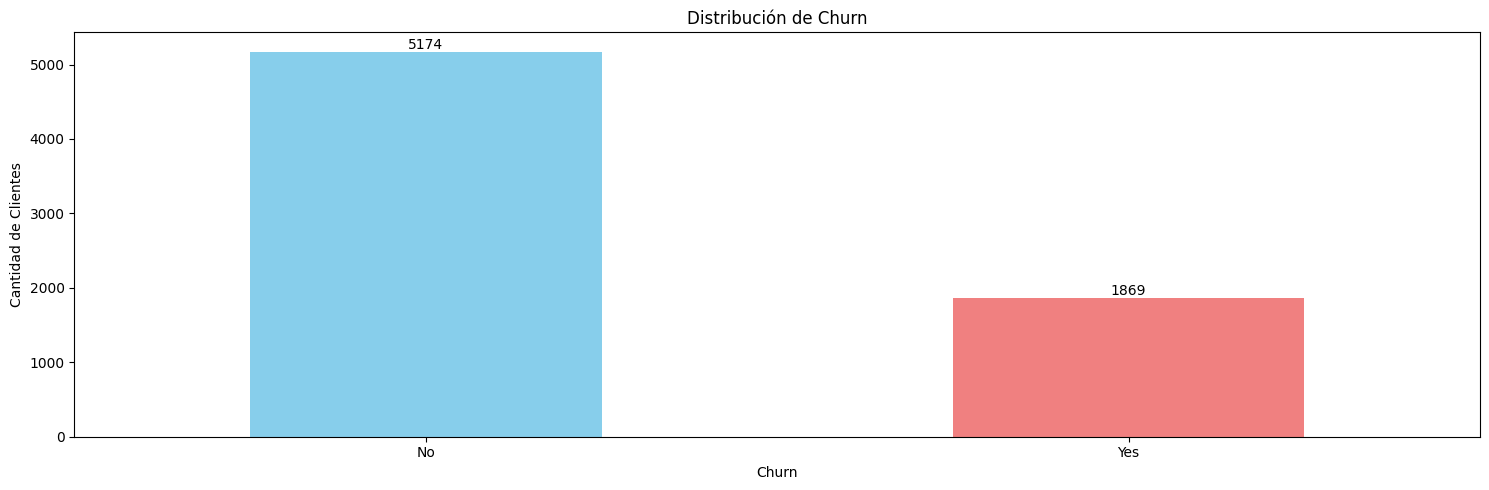

In [7]:
# Visualización de la distribución de la variable objetivo 'Churn'
obj = df['Churn'].value_counts()

plt.figure(figsize=(15, 5))
obj.plot(
    kind='bar',
    color=['skyblue', 'lightcoral'],
    title='Distribución de Churn',
    xlabel='Churn',
    ylabel='Cantidad de Clientes')
plt.xticks(rotation = 0)
for index, value in enumerate(obj.values):
    plt.text(index, value, value, ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Corrección de algunos tipos de datos y eliminación de variable irrelevante

In [8]:
# Convierto la columna "SeniorCitizen" de int64 a object
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# Convierto la columna "TotalCharges" de object a float64
df['TotalCharges'].value_counts()
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Reemplazo los valores nulos por el valor de "MonthlyCharges"
# df['MonthlyCharges'][(df['TotalCharges'] == ' ')]
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)

# Elimino la columna "customerID"
df = df.drop(['customerID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Convertir variables para matriz de correlación

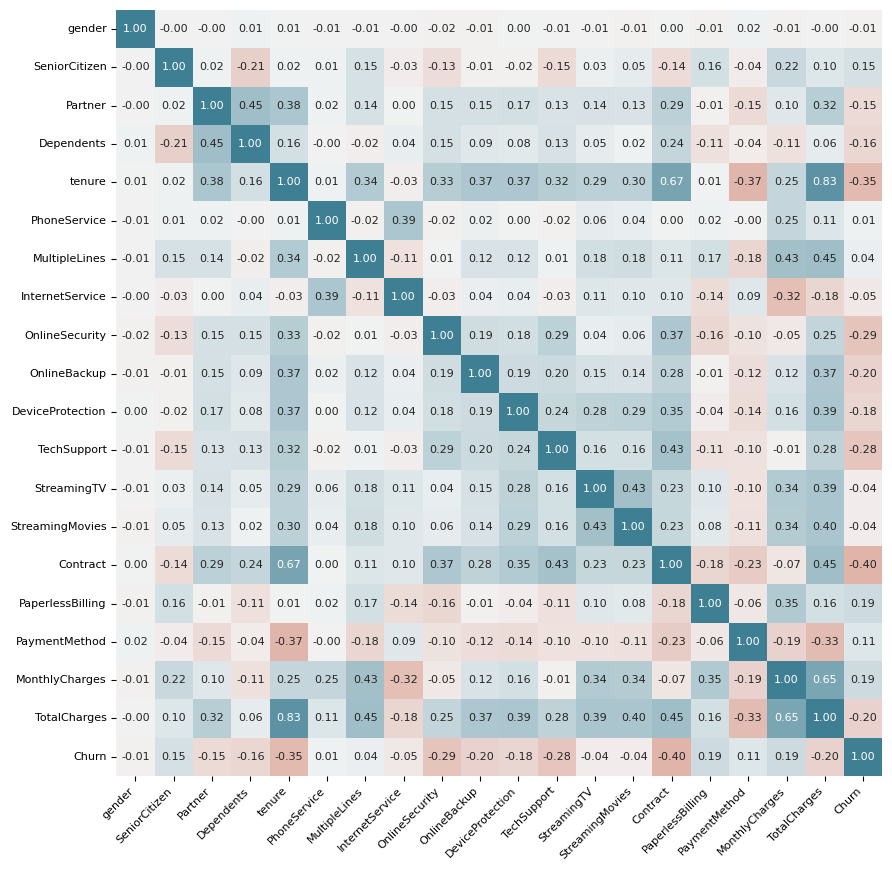

In [9]:
# Codifico con "LabelEncoder" los datos categoricos
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
le = LabelEncoder()
df_corr = df.copy()
df_corr[columns] = df_corr[columns].apply(le.fit_transform)

# Grafica de la matriz de correlación
corr_matrix = df_corr.corr(method='pearson')

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cbar=False, annot_kws={"size": 8}, vmin=-1, center=0, vmax=1, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

## Hipótesis💡

### 1. Relación entre Permanencia (Tenure) y Churn

Una de las hipótesis planteadas es que los clientes con menor permanencia en la compañía (**tenure**) tienen mayor probabilidad de darse de baja (**Churn = "Yes"**). Este análisis busca validar esa hipótesis mediante un gráfico de distribución y cálculos estadísticos.

En particular, evaluaremos:
- La distribución de **tenure** entre clientes que se dieron de baja y los que permanecieron.
- Las medias y medianas de cada grupo.

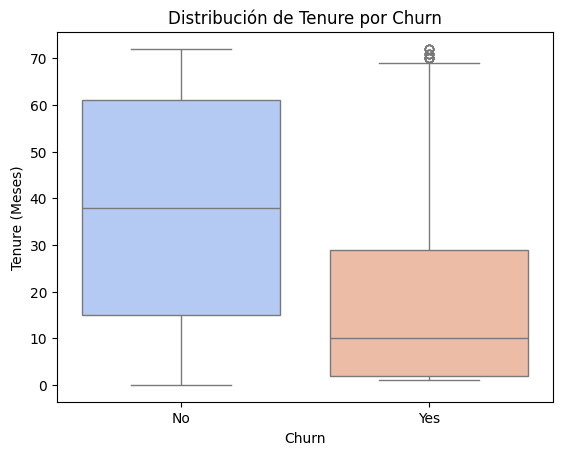

Estadísticas de Tenure por Churn:
        mean  median
Churn               
No     37.57    38.0
Yes    17.98    10.0


In [10]:
# Boxplot para analizar la relación entre tenure y churn
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.show()

# Calcular medias y medianas de tenure por grupo de churn
tenure_stats = df.groupby('Churn')['tenure'].agg(['mean', 'median'])
print("Estadísticas de Tenure por Churn:")
print(tenure_stats.round(2))

#### Resultados

- Los clientes que se dieron de baja (**Churn = "Yes"**) tienen una permanencia significativamente menor en comparación con los que permanecieron (**Churn = "No"**).
- Esto se refleja en la mediana de `tenure`, que es más baja para el grupo con churn.

Estos resultados respaldan la hipótesis de que la permanencia corta está asociada a una mayor probabilidad de churn.

### 2. Tipo de Contrato y Churn

Otra hipótesis clave es que los clientes con contratos "Month-to-month" tienen mayor probabilidad de churn en comparación con aquellos con contratos a más largo plazo. Esto podría deberse a que los contratos de mayor duración ofrecen incentivos que favorecen la retención.

Para validar esta hipótesis, utilizaremos un gráfico de barras apiladas que muestra la proporción de churn según el tipo de contrato.

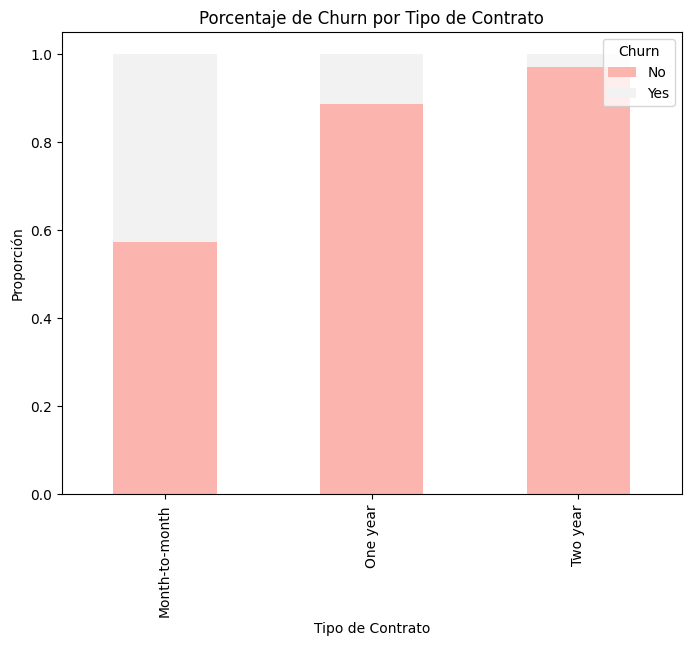

In [11]:
# Gráfico de barras apiladas para analizar tipo de contrato y churn
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_percentage = contract_churn.div(contract_churn.sum(axis=1), axis=0)
contract_churn_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Pastel1')
plt.title('Porcentaje de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.legend(title='Churn', loc='upper right')
plt.show()

#### Resultados

- Los clientes con contrato "Month-to-month" tienen la tasa de churn más alta en comparación con los contratos "One year" y "Two year".
- Este patrón sugiere que los contratos a largo plazo podrían jugar un papel importante en la retención de clientes.

Estos hallazgos confirman la hipótesis y apuntan a la posibilidad de ofrecer mejores incentivos para que los clientes adopten contratos a largo plazo.

### 3. Método de Pago y Churn

Los métodos de pago podrían estar relacionados con la probabilidad de churn. Específicamente, evaluaremos si el uso de "Electronic check" está asociado con una mayor tasa de churn en comparación con otros métodos.

Este análisis se realizará mediante un gráfico de barras que muestra la proporción de churn para cada método de pago.

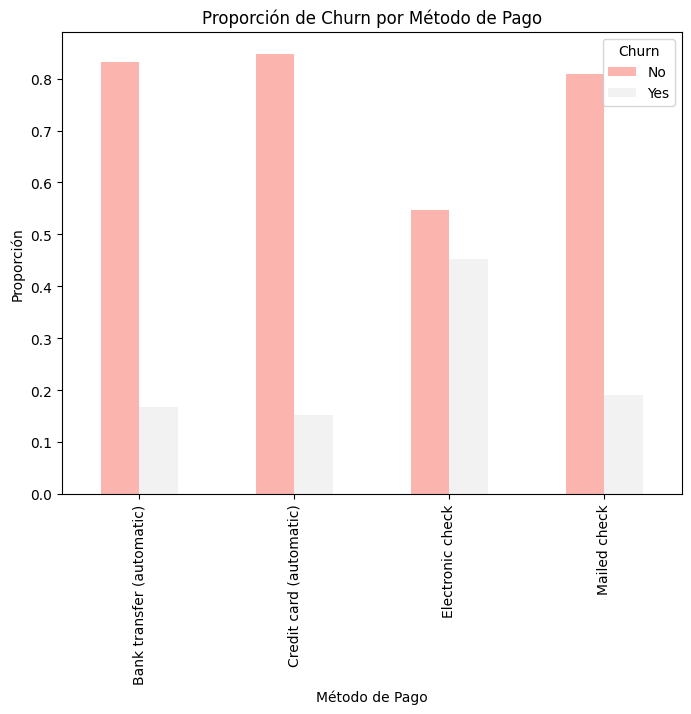

In [12]:
# Gráfico de barras para analizar método de pago y churn
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_churn_percentage = payment_churn.div(payment_churn.sum(axis=1), axis=0)
payment_churn_percentage.plot(kind='bar', figsize=(8, 6), colormap='Pastel1')
plt.title('Proporción de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Proporción')
plt.legend(title='Churn', loc='upper right')
plt.show()


#### Resultados

- Los clientes que utilizan "Electronic check" tienen una proporción significativamente mayor de churn en comparación con otros métodos de pago.
- Este resultado podría estar relacionado con una menor satisfacción percibida en este método, ya que otros métodos, como "Bank transfer" o "Credit card", presentan tasas de churn más bajas.

Este hallazgo refuerza la importancia de investigar las razones detrás del uso de "Electronic check" y buscar estrategias para reducir el churn en este segmento.


### 4. Relación entre TotalCharges y churn

El monto total que se esta cargando en la facturación (TotalCharges) puede estar relacionado con la probabilidad de Churn. Para estudiar esto, observaremos los cargos mensuales y validar si son los clientes con cargos bajos los que tienen mayor churn respecto a los clientes con cargos altos.
Este análisis se realizará con un scatterplot para ver la distribución mencionada coloreando los puntos según el churn.

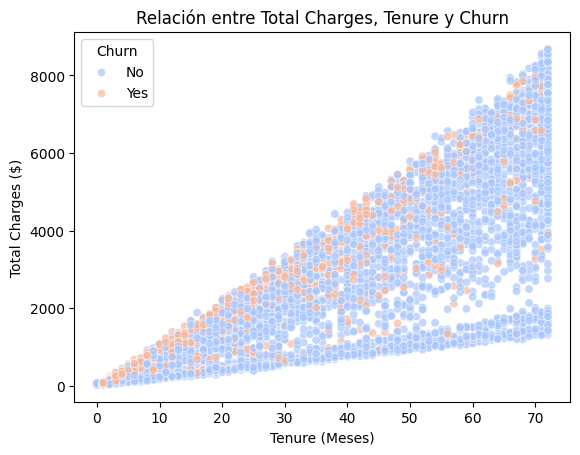

In [13]:
# Scatter plot para observar la relación entre TotalCharges y churn
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, alpha=0.7, palette='coolwarm')
plt.title('Relación entre Total Charges, Tenure y Churn')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Total Charges ($)')
plt.show()

#### Resultados

- Los clientes que tienen menos meses de permanencia dentro de la compañia y que tienen cargos bajos son aquellos donde se identifica mayor churn.
- El resultado podria estar relacionado al menor sentido de permanencia o insatisfacción, ya que clientes con mayor permanencia y cargos altos de facturación tiene tasa de churn más baja.
- Tambien podriamos buscar estrategias de fidelización para clientes en los primeros meses dentro de la compañía.

Con el hallazgo respaldamos la hipótesis de que los cargos de facturación bajos tienen mayor asociación con la probabilidad de churn.

### 5. Personas a cargo y churn

Los clientes con personas a cargo suelen tener una baja relacion asociada al churn debido a que son clientes con familia con mayor estabilidad y menos probabilidad de cambio entre empresas.
Para validar esto graficaremos la distribución proporcional de cada uno en un grafico apilado.

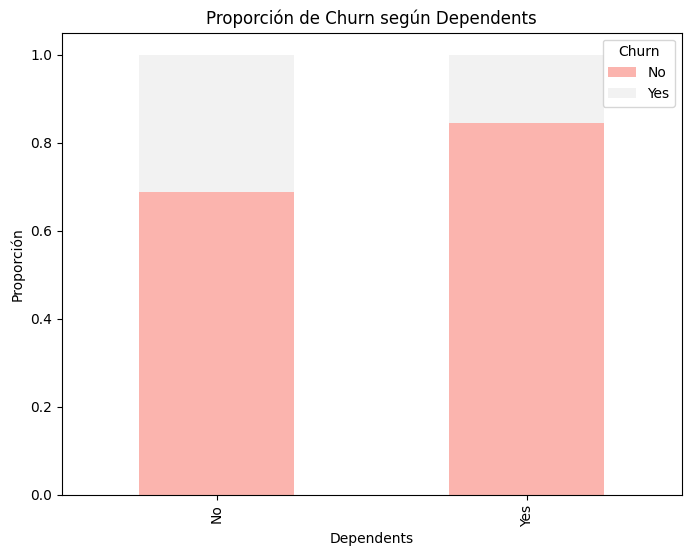

In [14]:
# Gráfico de barras para analizar personas a cargo (Dependents) y churn
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack()
dependents_churn_percentage = dependents_churn.div(dependents_churn.sum(axis=1), axis=0)
dependents_churn_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Pastel1')
plt.title('Proporción de Churn según Dependents')
plt.xlabel('Dependents')
plt.ylabel('Proporción')
plt.legend(title='Churn', loc='upper right')
plt.show()


#### Resultados

- Los clientes con personas a cargo (dependents) tienen una alta tasa de permanencia, por lo cual son usuarios mas fieles y estables dentro de la compañia.
- De todos modos, los clientes sin personas a cargo tienen una fuga baja, aunque casi el doble de las que si tienen dependencias.
- Otra sugerencia podrían ser el diseñar estrategias enfocadas en beneficios familiares o descuentos por múltiples líneas para mejorar la retención.

Si bien este hallazgo no tiene una gran significancia, si ayuda para tener claridad de la variable.

## Prepocesamiento de datos 🛠️

### Copia de dataset y corrección de variable

In [15]:
# Copia del dataset original
df_prep = df.copy()

# Convertir variable SeniorCitizen a int64
df_prep['SeniorCitizen'] = df_prep['SeniorCitizen'].astype('int64')

### Convertir variables categóricas en númericas

In [16]:
# Variables binarias (Label Encoding)
binarias = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
df_prep[binarias] = df_prep[binarias].apply(le.fit_transform)  # Label Encoding


# Variables categóricas con múltiples valores (One-Hot Encoding)
categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_prep = pd.get_dummies(df_prep, columns=categoricas, drop_first=True)  # OHE

### Escalado de las variables númericas

In [17]:
scaler = StandardScaler()
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_prep[numericas] = scaler.fit_transform(df_prep[numericas])

## División del dataset 🪚

In [18]:
# Separar en conjunto de entrenamiento (train) y prueba (test)
X = df_prep.drop('Churn', axis=1)  # Variables independientes
y = df_prep['Churn'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento 💪🏻

### 1. Regresión Logística

In [ ]:
# Entrenamiento del modelo
reg_log = LogisticRegression(max_iter=1000, random_state=42) # Instancio el modelo
reg_log.fit(X_train, y_train) # Ajusto el modelo

# Predicciones
y_pred = reg_log.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Resultados
print("Accuracy: " + str(accuracy))
print("Matriz de Confusión: \n" + str(conf_matrix))
print("Reporte de Clasificación: \n" + str(class_report))

#### Resultados

- Precisión (accuracy): ***80.48%***
- Matriz de confusión:
    - True Negative  (TN): ***925*** clientes no churn clasificados correctamente
    - False Positive (FP): ***110*** clientes no churn clasificados incorrectamente
    - False Negative (FN): ***165*** clientes churn clasificados incorrectamente
    - True Positive  (TP): ***209*** clientes churn clasificados correctamente
- Reporte de Clasificación:
    - Clase 0 (Churn: NO):
        - Precisión: ***85%***
        - Recall: ***89%***
        - F1-score: ***87%***
    - Clase 1 (Churn: YES):
        - Precisión: ***66%***
        - Recall: ***56%***
        - F1-score: ***60%***
    - Promedios macro y ponderado:
        - F1-score promedio: ***80%***


*Si bien el modelo tiene buen desempeño en la clase 0 (Churn: NO), la clase 1 (Churn: YES) tiene un recall bajo (56%), lo que significa que no detecta a todos los clientes que realmente se dan de baja. Considerando que el objetivo es disminuir la fuga, la recomendación sería ajustar los parámetros o probar con otro modelo.*

#### Importancia de las variables

In [ ]:
importancia = reg_log.coef_[0]
variables = X.columns
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia})
df_importancia = df_importancia.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='coolwarm')
plt.title('Importancia de las Variables')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


### 2. Random Forest

In [ ]:
# Entrenamiento del modelo
rf = RandomForestClassifier(random_state=42) # Instancio el modelo
rf.fit(X_train, y_train) # Ajusto el modelo

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Resultados
print("Accuracy: " + str(accuracy))
print("Matriz de Confusión: \n" + str(conf_matrix))
print("Reporte de Clasificación: \n" + str(class_report))


#### Resultados

- Precisión (accuracy): ***78.71%***
- Matriz de confusión:
    - True Negative  (TN): ***930*** clientes no churn clasificados correctamente
    - False Positive (FP): ***105*** clientes no churn clasificados incorrectamente
    - False Negative (FN): ***195*** clientes churn clasificados incorrectamente
    - True Positive  (TP): ***179*** clientes churn clasificados correctamente
- Reporte de Clasificación:
    - Clase 0 (Churn: NO):
        - Precisión: ***83%***
        - Recall: ***90%***
        - F1-score: ***86%***
    - Clase 1 (Churn: YES):
        - Precisión: ***63%***
        - Recall: ***48%***
        - F1-score: ***54%***
    - Promedios macro y ponderado:
        - F1-score promedio: ***79%***


*Si bien el modelo tiene buen desempeño en la clase 0 (Churn: NO), la clase 1 (Churn: YES) tiene un recall más bajo que el modelo anterior (48%), lo que significa que no detecta a todos los clientes que realmente se dan de baja. Considerando que el objetivo es disminuir la fuga, la recomendación sería ajustar los parámetros o probar con otro modelo.*

#### Importancia de las variables

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Importancia de las Variables")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### 3. XGBoost

In [ ]:
# Entrenamiento del modelo
xgb = XGBClassifier(random_state=42) # Instancio el modelo
xgb.fit(X_train, y_train) # Ajusto el modelo

# Predicciones
y_pred = xgb.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Resultados
print("Accuracy: " + str(accuracy))
print("Matriz de Confusión: \n" + str(conf_matrix))
print("Reporte de Clasificación: \n" + str(class_report))


#### Resultados

- Precisión (accuracy): ***78.57%***
- Matriz de confusión:
    - True Negative  (TN): ***911*** clientes no churn clasificados correctamente
    - False Positive (FP): ***124*** clientes no churn clasificados incorrectamente
    - False Negative (FN): ***178*** clientes churn clasificados incorrectamente
    - True Positive  (TP): ***196*** clientes churn clasificados correctamente
- Reporte de Clasificación:
    - Clase 0 (Churn: NO):
        - Precisión: ***84%***
        - Recall: ***88%***
        - F1-score: ***86%***
    - Clase 1 (Churn: YES):
        - Precisión: ***61%***
        - Recall: ***52%***
        - F1-score: ***56%***
    - Promedios macro y ponderado:
        - F1-score promedio: ***79%***


*Si bien el modelo tiene buen desempeño en la clase 0 (Churn: NO) y la clase 1 (Churn: YES) mejoró respecto al modelo anterior (recall: 52%) continua no detectando a todos los clientes que realmente se dan de baja. Considerando que el objetivo es disminuir la fuga, la recomendación sería ajustar los parámetros o probar con otro modelo.*

#### Importancia de las variables

In [ ]:
# Importancia de las variables
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Importancia de las Variables")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


## Optimización 🚀

### 1. GridSearchCV + Random Forest

In [ ]:
# Definir hiperparámetros
params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
}

# Instanciar modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
# Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
# Mejores hiperparámetros: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


# Instanciar GridSearchCV
gs = GridSearchCV(rf, cv=3, param_grid=params, scoring="accuracy", n_jobs=-1, verbose=3)

# Entrenar GridSearchCV
gs.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros: " + str(gs.best_params_))

# Mejores scores
print("Mejor score: " + str(gs.best_score_))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Mejor score: 0.7878949236776713


In [55]:
# Mejor modelo
best_rf = rf.best_estimator_

# Predicciones
y_pred = best_rf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Resultados
print("Accuracy: " + str(accuracy))
print("Matriz de Confusión: \n" + str(conf_matrix))
print("Reporte de Clasificación: \n" + str(class_report))


Accuracy: 0.772888573456352
Matriz de Confusión: 
[[828 207]
 [113 261]]
Reporte de Clasificación: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



### 2. GridSearchCV + Stratified K Fold + Random Forest

In [57]:
# Definir hiperparámetros
params = {
    'n_estimators': [80,85,90,95,100],
    'max_depth': [10,12,14,16]
}
#12;90
#14,80 -> 0,9538

# Instanciar modelo
rf = RandomForestClassifier(class_weight='balanced')

# Instanciar StratifiedKFold
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(rf, params, cv=S_kfold, scoring='accuracy', return_train_score=True, verbose=3)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros: " + str(grid_search.best_params_))

# Mejores scores
print("Mejor score: " + str(grid_search.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=10, n_estimators=80;, score=(train=0.874, test=0.779) total time=   0.3s
[CV 2/5] END max_depth=10, n_estimators=80;, score=(train=0.870, test=0.757) total time=   0.5s
[CV 3/5] END max_depth=10, n_estimators=80;, score=(train=0.868, test=0.779) total time=   0.8s
[CV 4/5] END max_depth=10, n_estimators=80;, score=(train=0.870, test=0.788) total time=   0.3s
[CV 5/5] END max_depth=10, n_estimators=80;, score=(train=0.870, test=0.792) total time=   1.1s
[CV 1/5] END max_depth=10, n_estimators=85;, score=(train=0.872, test=0.781) total time=   0.4s
[CV 2/5] END max_depth=10, n_estimators=85;, score=(train=0.865, test=0.763) total time=   0.3s
[CV 3/5] END max_depth=10, n_estimators=85;, score=(train=0.867, test=0.778) total time=   0.2s
[CV 4/5] END max_depth=10, n_estimators=85;, score=(train=0.871, test=0.795) total time=   0.5s
[CV 5/5] END max_depth=10, n_estimators=85;, score=(train=0.863, test=0.79

In [58]:
# Realizar predicciones en el conjunto de prueba
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Resultados
print("Accuracy: " + str(accuracy))
print("Matriz de Confusión: \n" + str(conf_matrix))
print("Reporte de Clasificación: \n" + str(class_report))


Accuracy: 0.7877927608232789
Matriz de Confusión: 
[[880 155]
 [144 230]]
Reporte de Clasificación: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [60]:
# Obtener probabilidades de la clase 1 (churn)
y_probs = grid_search.predict_proba(X_test)[:, 1]  

# Probar diferentes umbrales
for threshold in [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2]:
    y_pred_adj = (y_probs > threshold).astype(int)
    print(f"\n🔹 Reporte con umbral {threshold}:")
    print(classification_report(y_test, y_pred_adj))



🔹 Reporte con umbral 0.5:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409


🔹 Reporte con umbral 0.45:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


🔹 Reporte con umbral 0.4:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.69      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72   

## Conclusión

Considerando que buscamos evitar la fuga de clientes, buscamos el mejor equilibrio entre la precisión y el recall (Umbral: 0.35)